In [1]:
import tensorflow as tf

In [7]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Make Original Data

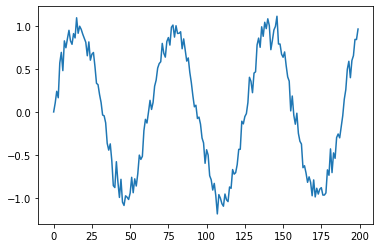

In [44]:
series = np.sin(0.1*np.arange(200))+ np.random.randn(200)*0.1
#plot it
plt.plot(series)
plt.show()

Build Dataset

In [45]:
#Lets see if we can use T past values to predict the next value
T = 10
X = []
Y = []
for t in range(len(series) - T):
  x = series[t:t+T]
  X.append(x)
  y = series[t+T]
  Y.append(y)

X = np.array(X).reshape(-1, T)
Y = np.array(Y)
N = len(X)
print("X.shape", X.shape, 'Y.shape', Y.shape)

X.shape (190, 10) Y.shape (190,)


Autoregressive Linear Model

In [46]:
i = Input(shape=(T,))
x = Dense(1)(i)
model = Model(i, x)
model.compile(
    loss='mse',
    optimizer=Adam(0.1)
)

Train the model

In [47]:
r = model.fit(
    X[:-N//2], Y[:-N//2],
    epochs = 80,
    validation_data=(X[-N//2:],Y[-N//2:]),
)

Epoch 1/80
3/3 [==============================] - 1s 75ms/step - loss: 0.3603 - val_loss: 0.1813
Epoch 2/80
3/3 [==============================] - 0s 26ms/step - loss: 0.1255 - val_loss: 0.0718
Epoch 3/80
3/3 [==============================] - 0s 27ms/step - loss: 0.0392 - val_loss: 0.0331
Epoch 4/80
3/3 [==============================] - 0s 28ms/step - loss: 0.0405 - val_loss: 0.0428
Epoch 5/80
3/3 [==============================] - 0s 19ms/step - loss: 0.0532 - val_loss: 0.0696
Epoch 6/80
3/3 [==============================] - 0s 22ms/step - loss: 0.0637 - val_loss: 0.0604
Epoch 7/80
3/3 [==============================] - 0s 19ms/step - loss: 0.0473 - val_loss: 0.0320
Epoch 8/80
3/3 [==============================] - 0s 21ms/step - loss: 0.0295 - val_loss: 0.0229
Epoch 9/80
3/3 [==============================] - 0s 28ms/step - loss: 0.0200 - val_loss: 0.0210
Epoch 10/80
3/3 [==============================] - 0s 18ms/step - loss: 0.0218 - val_loss: 0.0241
Epoch 11/80
3/3 [============

Plot Loss and accuracy

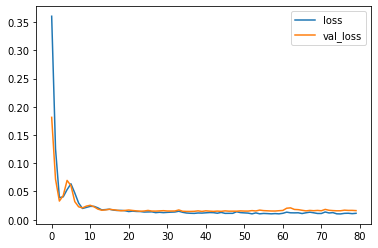

In [48]:
#Plot loss per iteration
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

In [49]:
#Wrong forecast using true target

validation_target = Y[-N//2:]
validation_prerdiction = []

#index of list validation input
i = -N //2

while len(validation_prerdiction) < len(validation_target):
  p = model.predict(X[i].reshape(1, -1))[0,0] # 1x1 array -> scalar
  i += 1

  #update the prediction list
  validation_prerdiction.append(p)
  

1/1 [==============================] - 0s 24ms/step


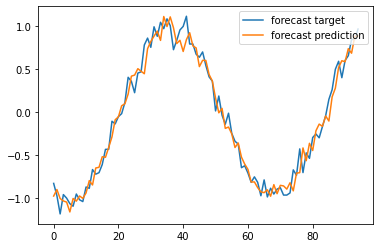

In [50]:
plt.plot(validation_target, label='forecast target')
plt.plot(validation_prerdiction, label='forecast prediction')
plt.legend()

Correct Way

In [51]:
#Forecast future values (use only self-predictions for making future predictions)
validation_target = Y[-N//2:]
validation_predictions = []

#last train input
last_x = X[-N // 2] #1 -D array of length T

while len(validation_predictions) < len(validation_target):
  p = model.predict(last_x.reshape(1, -1))[0,0] #1x1 array -> scalar

  #Update the prediciton list
  validation_predictions.append(p)

  #make the new input
  last_x = np.roll(last_x, -1)
  last_x[-1] = p



1/1 [==============================] - 0s 24ms/step


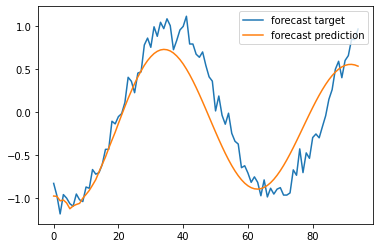

In [52]:
plt.plot(validation_target, label='forecast target')
plt.plot(validation_predictions, label='forecast prediction')
plt.legend()